In [1]:
using Distributions, Gadfly
set_default_plot_size(24cm, 16cm)

In [2]:
k = 10
qn = Normal(0, 5)
qa = rand(qn, k)
bandits = map(q -> Normal(q, 5), qa)

10-element Array{Distributions.Normal,1}:
 Distributions.Normal(μ=7.488991118376321, σ=5.0) 
 Distributions.Normal(μ=1.9703950618211397, σ=5.0)
 Distributions.Normal(μ=-2.221177930162886, σ=5.0)
 Distributions.Normal(μ=0.5837454594078647, σ=5.0)
 Distributions.Normal(μ=4.017998727105996, σ=5.0) 
 Distributions.Normal(μ=-2.98622103008521, σ=5.0) 
 Distributions.Normal(μ=0.6548632189108257, σ=5.0)
 Distributions.Normal(μ=-8.746176831449016, σ=5.0)
 Distributions.Normal(μ=7.017589668460655, σ=5.0) 
 Distributions.Normal(μ=1.1179059385924184, σ=5.0)

In [29]:
μ_star, a_star = findmax(qa)

(7.488991118376321,1)

In [4]:
bandit(a) = rand(bandits[a])

bandit (generic function with 1 method)

In [5]:
bandit(a_star)

3.266676765251634

In [6]:
function ϵgreedy(ϵ, T = 1000)
    R = zeros(Float64, T)
    A = Array(Int, T)
    
    Q = zeros(Float64, k)
    N = zeros(Int, k)

    xx = Bernoulli(ϵ)
    xa = DiscreteUniform(1, k)
    
    exploit() = begin
        # breaking ties randomly
        q, _ = findmax(Q)
        A_tied = find(p -> p == q, Q)
        length(A_tied) != 1 && shuffle!(A_tied)
        A_tied[1]
    end

    explore() = rand(xa)

    for t=1:T
        a = rand(xx) == 0 ? exploit() : explore()
        r = bandit(a)

        N[a] += 1
        Q[a] += (r - Q[a]) / N[a]

        R[t] = r
        A[t] = a
    end
    
    (A, R)
end

ϵgreedy (generic function with 2 methods)

In [7]:
A_greedy, R_greedy = ϵgreedy(0)
string("Greedy: action = ", A_greedy[end], ", total reward = ", sum(R_greedy))

"Greedy: action = 9, total reward = 6991.775781249175"

In [8]:
hist(A_greedy, 0:k)[2]

10-element Array{Int64,1}:
   0
   1
   0
   6
   0
   0
   0
   1
 992
   0

In [23]:
aplot(t, A) = plot(x = 1:t, y = A[1:t])

aplot (generic function with 1 method)

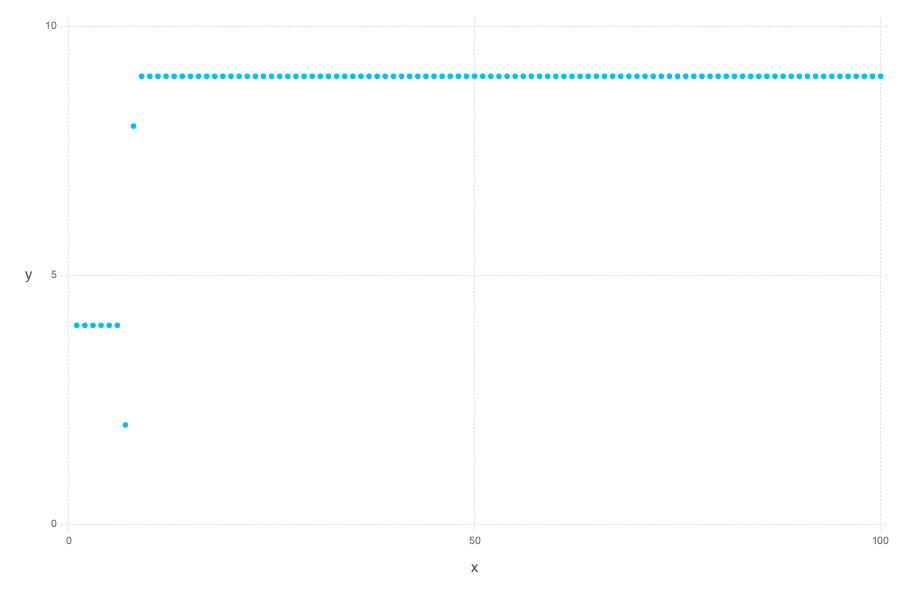

In [25]:
aplot(100, A_greedy)

In [9]:
A_ϵgreedy, R_ϵgreedy = ϵgreedy(0.1)
string("ϵ-Greedy [ϵ = 0.1]: action = ", A_ϵgreedy[end], ", total reward = ", sum(R_ϵgreedy))

"ϵ-Greedy [ϵ = 0.1]: action = 9, total reward = 6255.6576586498895"

In [10]:
hist(A_ϵgreedy, 0:k)[2]

10-element Array{Int64,1}:
  24
   5
   6
  11
  21
  13
  12
  13
 887
   8

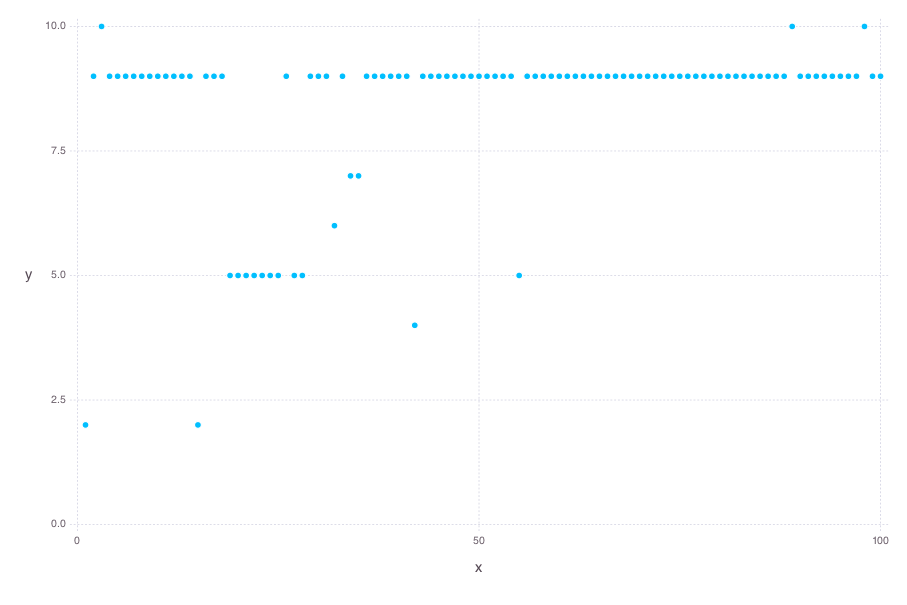

In [27]:
aplot(100, A_ϵgreedy)

In [11]:
A_ϵgreedy001, R_ϵgreedy001 = ϵgreedy(0.01)
string("ϵ-Greedy [ϵ = 0.01]: action = ", A_ϵgreedy001[end], ", total reward = ", sum(R_ϵgreedy001))

"ϵ-Greedy [ϵ = 0.01]: action = 9, total reward = 6692.391619386648"

In [12]:
hist(A_ϵgreedy001, 0:k)[2]

10-element Array{Int64,1}:
   0
   0
   5
  45
   1
   2
   2
   2
 943
   0

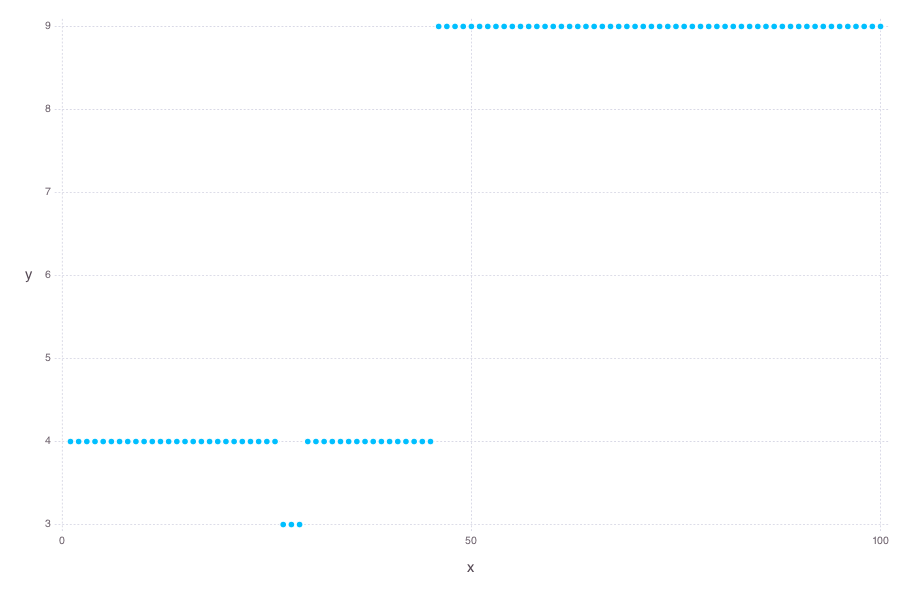

In [28]:
aplot(100, A_ϵgreedy001)

In [13]:
function simulate(ϵ, T = 1000, N = 2000)
    avg = zeros(Float64, T)

    for n=1:N
        _, R = ϵgreedy(0)
        avg += (R - avg) / n 
    end

    avg
end

simulate (generic function with 3 methods)

In [14]:
R_greedy_avg = simulate(0)

1000-element Array{Float64,1}:
 1.08469
 2.23423
 2.96928
 3.39566
 3.56586
 4.08409
 4.19425
 4.37508
 4.47358
 4.75092
 4.59104
 4.72985
 4.7844 
 ⋮      
 5.01144
 5.04485
 5.24494
 5.08224
 5.24096
 4.95246
 4.94878
 5.10752
 5.12726
 5.09921
 5.30514
 5.06099

In [15]:
R_ϵgreedy_avg = simulate(0.1)

1000-element Array{Float64,1}:
 0.83143
 2.21046
 2.9439 
 3.4293 
 3.74425
 3.88424
 4.13972
 4.59002
 4.22958
 4.64483
 4.69618
 4.58315
 4.5038 
 ⋮      
 4.93921
 4.93413
 5.11531
 5.03051
 5.16343
 4.87095
 4.95313
 5.12276
 5.04178
 5.1866 
 5.12435
 5.13903

In [16]:
R_ϵgreedy001_avg = simulate(0.01)

1000-element Array{Float64,1}:
 0.968687
 2.23943 
 2.95495 
 3.62962 
 3.88745 
 4.19063 
 4.2259  
 4.17444 
 4.21587 
 4.70435 
 4.61439 
 4.64516 
 4.59224 
 ⋮       
 5.30625 
 5.26361 
 5.07985 
 5.22657 
 5.3732  
 4.86979 
 4.99494 
 5.33518 
 5.25868 
 5.07543 
 5.18427 
 5.09295 

In [21]:
rplot(t = 1000) = plot(layer(x = 1:t, y = R_greedy_avg[1:t], color = fill("Greedy", t), Geom.line),
    layer(x = 1:t, y = R_ϵgreedy_avg[1:t], color = fill("ϵ-Greedy [ϵ = 0.1]", t), Geom.line),
    layer(x = 1:t, y = R_ϵgreedy001_avg[1:t], color = fill("ϵ-Greedy [ϵ = 0.01]", t), Geom.line),
    Theme(key_position=:bottom))

rplot (generic function with 2 methods)

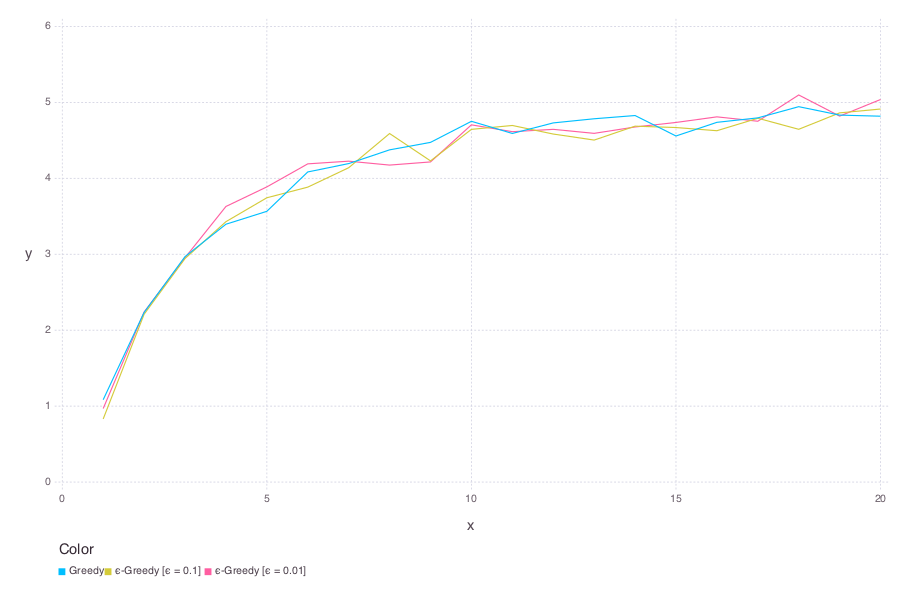

In [20]:
g = rplot(20)

In [19]:
draw(PNG("epsilon-greedy.png", 24cm, 16cm), g)